# Efficient Frontier

We will use the monthly returns data for 30 different industry portfolios. The data is downloaded from Kenneth French's website: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html.

'30 Industry Portfolios' -- the csv file has both value-weighted and equal-weighted monthly returns for the 30 industries. We will use only the value-weighted returns in this exercise, which are in the first 1173 rows of the table.

In [1]:
import pandas as pd
ind = pd.read_csv("ind30_m_rets.csv",
                  skiprows=11,nrows=1173,
                  header=0,index_col=0,
                  parse_dates=True
                  )/100 #to get the values in decimals

C:\Users\shantala.mukherjee\AppData\Local\Temp\ipykernel_15800\2929701687.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("ind30_m_rets.csv",


In [2]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0191,-0.2379,0.0007,0.0187,-0.0002,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0797,...,0.0217,0.0202,0.0439,-0.0238,0.0485,0.0539,-0.0075,-0.0013,0.0447,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0230,...,0.0241,0.0225,0.0019,-0.0554,0.0007,-0.0787,0.0025,-0.0056,-0.0161,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0261,-0.1538,-0.0220,-0.0411,-0.0551,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0310,...,0.0163,0.0377,0.0364,0.0384,0.0161,0.0467,0.0652,0.0433,0.0234,0.0400


In [3]:
ind.index #doing this will show us the dtype of the index, which we will see is int, not date as we want

Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702, 192703,
       192704,
       ...
       202306, 202307, 202308, 202309, 202310, 202311, 202312, 202401, 202402,
       202403],
      dtype='int64', length=1173)

In [4]:
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')

In [5]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0191,-0.2379,0.0007,0.0187,-0.0002,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0797,...,0.0217,0.0202,0.0439,-0.0238,0.0485,0.0539,-0.0075,-0.0013,0.0447,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0230,...,0.0241,0.0225,0.0019,-0.0554,0.0007,-0.0787,0.0025,-0.0056,-0.0161,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0261,-0.1538,-0.0220,-0.0411,-0.0551,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0310,...,0.0163,0.0377,0.0364,0.0384,0.0161,0.0467,0.0652,0.0433,0.0234,0.0400


In [6]:
ind.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11',
             '2023-12', '2024-01', '2024-02', '2024-03'],
            dtype='period[M]', length=1173)

In [7]:
ind.columns  # running this will show us the column names, and we will be able to see there is a space after each column heading string of letters

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [8]:
ind.columns = ind.columns.str.strip() #strip out the blank space in the header names
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

We'll take all the steps above and put them in a function 'get_ind_returns' in the edhec_risk_kit.py file, as we will want to use this process again and again.

In [9]:
%load_ext autoreload
%autoreload 2

In [10]:
import edhec_risk_kit as erk

In [11]:
ind = erk.get_ind_returns()
ind.shape

c:\Users\shantala.mukherjee\OneDrive - Invartis Consulting\Python\edhec_risk_kit.py:59: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("ind30_m_rets.csv",


(1173, 30)

In [12]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0191,-0.2379,0.0007,0.0187,-0.0002,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0797,...,0.0217,0.0202,0.0439,-0.0238,0.0485,0.0539,-0.0075,-0.0013,0.0447,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0230,...,0.0241,0.0225,0.0019,-0.0554,0.0007,-0.0787,0.0025,-0.0056,-0.0161,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0261,-0.1538,-0.0220,-0.0411,-0.0551,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0310,...,0.0163,0.0377,0.0364,0.0384,0.0161,0.0467,0.0652,0.0433,0.0234,0.0400


<Axes: >

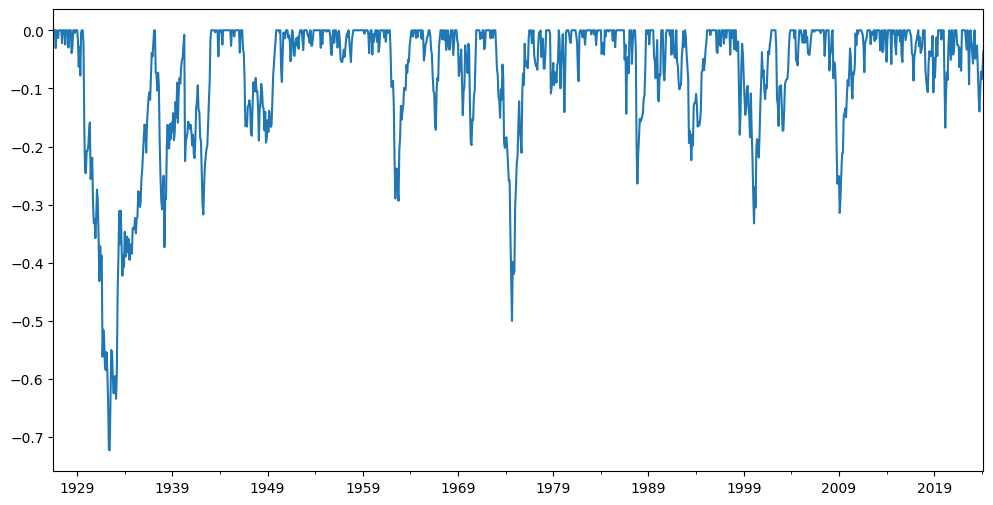

In [14]:
erk.drawdown(ind["Food"])["Drawdown"].plot.line(figsize=(12,6))

In [15]:
cols_of_interest = ["Food", "Smoke", "Coal", "Beer", "Fin"]
erk.var_gaussian(ind[cols_of_interest], modified=True)

Food     0.061111
Smoke    0.080966
Coal     0.062392
Beer     0.033095
Fin      0.076563
dtype: float64

In [16]:
erk.var_gaussian(ind, modified=True).sort_values().tail()

Carry    0.096842
Meals    0.098291
BusEq    0.099216
Games    0.102761
Mines    0.104073
dtype: float64

In [17]:
erk.var_gaussian(ind, modified=True).sort_values().head()

Beer     0.033095
Food     0.061111
Coal     0.062392
Hshld    0.064774
Servs    0.065912
dtype: float64

<Axes: >

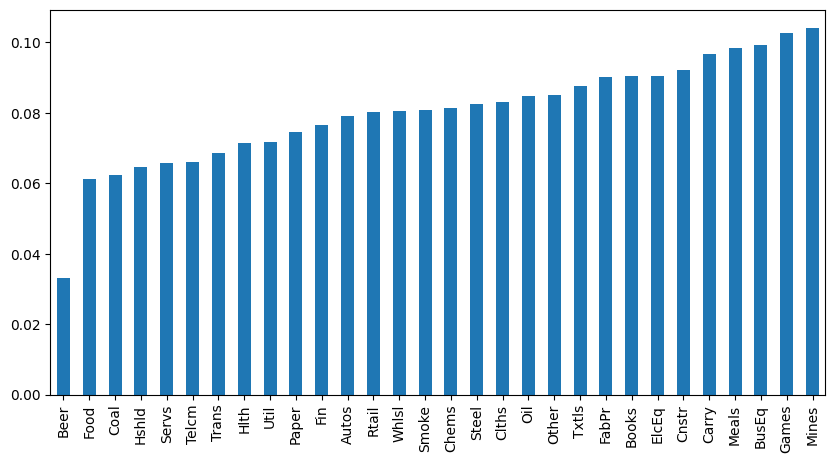

In [18]:
erk.var_gaussian(ind, modified=True).sort_values().plot.bar(figsize=(10,5))

Next, we define functions for annualised returns, annualised volatility, and sharpe ratio in the erk module

<Axes: title={'center': 'Industry Sharpe Ratios 1926 - 2024'}>

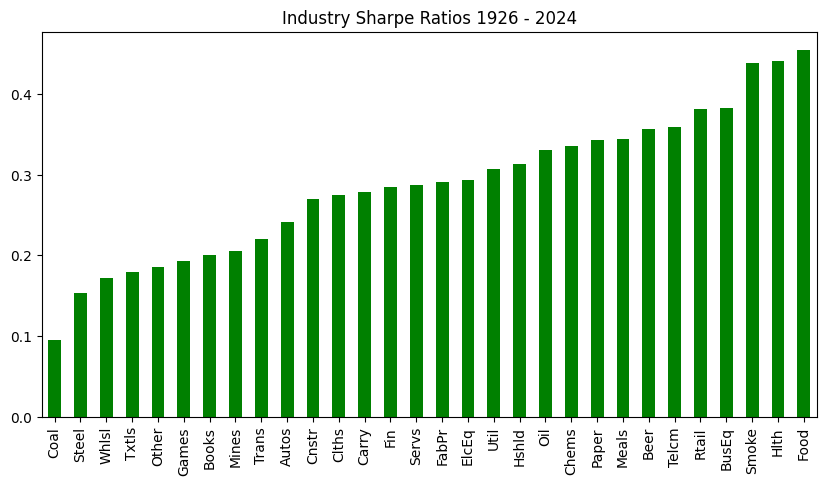

In [19]:
erk.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratios 1926 - 2024", color="green", figsize=(10,5))

<Axes: title={'center': 'Industry Sharpe Ratios 2000 - 2024'}>

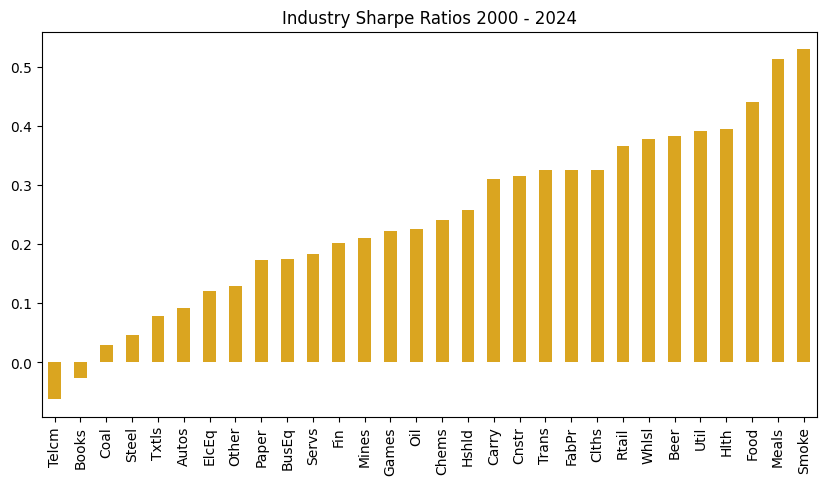

In [20]:
erk.sharpe_ratio(ind.loc["2000":], 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratios 2000 - 2024", color="goldenrod", figsize=(10,5))

In [21]:
# we will do an in-sample exercise, because we do not know the expected returns of the industries for future periods (so we just use the historical annualised returns)
er = erk.annualize_rets(ind.loc["1995":"2000"], 12) #this is a series of monthly returns, so periods_per_year = 12

<Axes: >

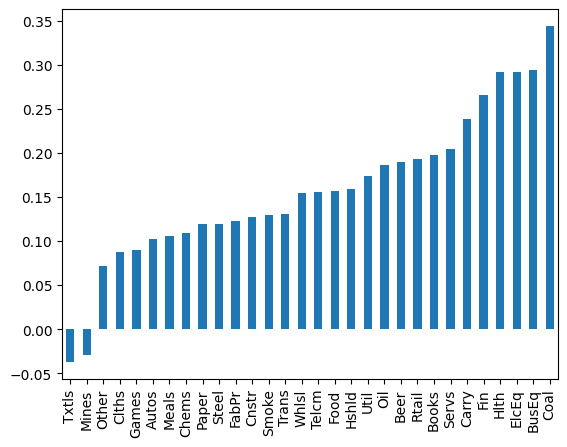

In [22]:
er.sort_values().plot.bar()

In [23]:
# covariance matrix
cov = ind.loc["1995":"2000"].cov()

In [24]:
cov.shape

(30, 30)

In [25]:
cov #returns a symmetric matrix. The diagonal has the variance of each industry (ie the covariance of each industry with itself)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002305,0.002099,0.001728,0.000706,0.000907,0.001244,0.001461,0.001110,0.001259,0.000994,...,0.000660,0.000251,-0.000247,0.001229,0.001318,0.000612,0.001177,0.001078,0.001858,0.000868
Beer,0.002099,0.004609,0.001145,0.001203,0.000756,0.002472,0.001380,0.001686,0.001290,0.001724,...,0.001029,0.000350,0.000035,0.001448,0.001957,0.000564,0.001438,0.001621,0.002250,0.001194
Smoke,0.001728,0.001145,0.007200,0.000285,-0.000121,0.000995,0.000749,0.000861,0.000603,0.000519,...,0.000125,-0.000272,-0.000276,0.001025,0.000287,0.001275,0.000085,0.000612,0.001102,0.001434
Games,0.000706,0.001203,0.000285,0.003237,0.001424,0.001053,0.001833,0.001240,0.001492,0.001255,...,0.001578,0.002370,0.002842,0.001620,0.001478,0.001650,0.001621,0.001425,0.002051,0.002109
Books,0.000907,0.000756,-0.000121,0.001424,0.002351,0.000853,0.002078,0.000674,0.001520,0.001379,...,0.001601,0.002049,0.001626,0.001496,0.001579,0.001313,0.002008,0.001020,0.001984,0.001272
Hshld,0.001244,0.002472,0.000995,0.001053,0.000853,0.002893,0.000968,0.001259,0.001163,0.001177,...,0.000864,0.001055,0.000882,0.001581,0.001356,0.000573,0.001135,0.001068,0.001667,0.001324
Clths,0.001461,0.001380,0.000749,0.001833,0.002078,0.000968,0.004623,0.000722,0.002501,0.002129,...,0.001276,0.001522,0.000901,0.002666,0.002543,0.001742,0.002626,0.002223,0.002715,0.001979
Hlth,0.001110,0.001686,0.000861,0.001240,0.000674,0.001259,0.000722,0.002275,0.000434,0.000554,...,0.001133,0.001434,0.001284,0.000530,0.000840,0.000880,0.000793,0.000889,0.001423,0.001143
Chems,0.001259,0.001290,0.000603,0.001492,0.001520,0.001163,0.002501,0.000434,0.002845,0.001667,...,0.000787,0.001070,0.000916,0.002534,0.001973,0.001285,0.001652,0.001437,0.002145,0.001841
Txtls,0.000994,0.001724,0.000519,0.001255,0.001379,0.001177,0.002129,0.000554,0.001667,0.002836,...,0.000804,0.000618,0.000718,0.001836,0.001761,0.001400,0.001681,0.001136,0.001787,0.001661
